# <u> Pré-traitements de données</u>

### Import des modules et librairies


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import matplotlib.pyplot as plt


### 1 - Chargement du jeu de données
Pour charger des jeu de données numériques et textuels, on utilise la bibliothèque **Panda**.
<br>
Le plus souvent nos données sont sous la forme d'un .csv que l'on peut importer aisément.

In [4]:
pd.set_option("display.max.columns", None)
df = pd.read_csv("../Datasets/Shom/shom_data.csv")

df.head()

,5.1,3.5,1.4,0.2,Whale
0,4.9,3.0,1.4,0.2,Whale
1,4.7,3.2,1.3,0.2,Whale
2,4.6,3.1,1.5,0.2,Whale
3,5.0,3.6,1.4,0.2,Whale
4,5.4,3.9,1.7,0.4,Whale


On remarque l'absence de nom des colonnes
<br>
On nomme donc les features inconnes : **a, b,c et d** ainsi que l'**espèce**  

In [6]:
df = pd.read_csv("../Datasets/Shom/shom_data.csv", header = None, names = ["a", "b", "c", "d", "Species"])

df.head()

,a,b,c,d,Species
0,5.1,3.5,1.4,0.2,Whale
1,4.9,3.0,1.4,0.2,Whale
2,4.7,3.2,1.3,0.2,Whale
3,4.6,3.1,1.5,0.2,Whale
4,5.0,3.6,1.4,0.2,Whale


### 2 - Visualisation et familiarisation avec le jeu de données
On utilise la méthode *describe* pour avoir une idée plus précise des données numériques

In [7]:
df.describe()

,a,b,c,d
count,153.000000,153.00000,153.000000,153.000000
mean,5.976471,3.04183,3.829412,1.166013
std,2.218960,1.15688,2.325258,0.822477
min,-5.700000,-3.40000,-4.300000,-1.900000
25%,5.100000,2.80000,1.600000,0.300000
50%,5.800000,3.00000,4.400000,1.300000
75%,6.400000,3.30000,5.100000,1.800000
max,23.600000,13.20000,20.800000,2.500000


On visualise aussi la distribution des espèces 

array([<AxesSubplot:ylabel='a'>], dtype=object)

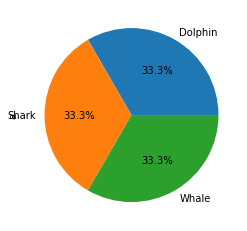

In [8]:
df.groupby(df["Species"])["a"].count().plot(kind='pie', subplots=True, autopct='%1.1f%%')


On constate donc que la distribution des espèce est équlibrée.
Cependant quelques valeurs semblent suspectent : 
* les valeurs négatives 
* les valeurs max qui semblent extrêmement éloignées des 3ème quartiles

In [12]:
test = df.loc[(df['a'] < 0) | (df['b'] < 0) | (df['c'] < 0) | (df['d'] < 0)]
test2 = df.loc[(df['a'] > 10) | (df['b'] > 10) | (df['c'] > 10)]

wanted = pd.concat([test, test2], axis=0)
wanted.head()

,a,b,c,d,Species
101,-5.7,-2.5,-4.3,-1.3,Dolphin
152,23.6,-3.4,20.8,-1.9,Shark
50,20.0,13.2,5.6,1.8,Whale
152,23.6,-3.4,20.8,-1.9,Shark


Les lignes détectées ont l'air erronées
<br>
Nous les supprimons donc du dataset

In [7]:
df = df.drop([50, 101, 152])
df.describe()

,a,b,c,d
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Le jeu de données est nettoyé, il est maintenant prêt à être utilisé